<a href="https://colab.research.google.com/github/Gethol/MusicGenreClassifier/blob/main/BISSIT_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import zipfile

drive.mount("content.drive")


Mounted at content.drive


In [ ]:
!unzip /content/content.drive/MyDrive/BISSIT\ Project/archive.zip

Archive:  /content/content.drive/MyDrive/BISSIT Project/archive.zip
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: Data/genres_original/blues/blues.00011.wav  
  inflating: Data/genres_original/blues/blues.00012.wav  
  inflating: Data/genres_original/blues/blues.00013.wav  
  inflating: Data/genres_original/blues/b

In [ ]:
import os
import librosa
import matplotlib.pyplot as plt

import pprint
import pickle

import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np
import shutil

In [ ]:

img_size = 256

def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
path = "/content/Data/"
image_path = "/content/Data/images_original/"

labels = [a for a in os.listdir(image_path)]
print(labels)

['pop', 'hiphop', 'disco', 'metal', 'jazz', 'blues', 'rock', 'classical', 'country', 'reggae']


In [ ]:

#Generating a 80 - 20 data split
def train_test_split(label):
  img_names = os.listdir(image_path+label)

  train_dir = path+"images_split/train/"+ label
  #print(train_dir)
  test_dir = path + "images_split/test/"+ label
  #print(test_dir)
  val_dir = path + "images_split/val/"+ label

  os.makedirs(train_dir)
  os.makedirs(test_dir)
  os.makedirs(val_dir)


  train_names = img_names[:80]
  #print(len(train_names))
  test_names = img_names[80:90]
  #print(len(test_names))
  val_names = img_names[90:]

  source_folder = image_path + label + "/"
  #print(source_folder)



  #Move files to create a training folder
  for name in train_names:
    destination_file_path = os.path.join(train_dir, name)
    #print("Destination file path: ", destination_file_path)
    source_file_path = source_folder + name
    #print("Source file path: ", source_file_path)
    shutil.copy(source_file_path, destination_file_path)


  for name in test_names:

    destination_file_path = os.path.join(test_dir, name)
    source_file_path = source_folder + name
    shutil.copy(source_file_path, destination_file_path)

  for name in val_names:
    destination_file_path = os.path.join(val_dir, name)
    source_file_path = source_folder + name
    shutil.copy(source_file_path, destination_file_path)

for label in labels:
  train_test_split(label)


In [ ]:
#
# blu1 = cv2.imread("/content/Data/images_split/train/blues/blues00000.png")
# pprint(blu1)

In [ ]:
#Represent the images as a numpy array
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format --- Array slicing to reverse order
                #print(img_arr)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
# Get the training and testing
train = get_data('/content/Data/images_split/train')
test = get_data('/content/Data/images_split/test')
val = get_data('/content/Data/images_split/val')


x_train = []
y_train = []

x_test = []
y_test = []

x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in test:
  x_test.append(feature)
  y_test.append(label)

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)


# Normalize the data
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

<ipython-input-8-06b2d88e45c9>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [ ]:

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        #rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        #horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
#CNN

model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 64)        0

In [ ]:
opt = Adam(learning_rate=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
BATCH_SIZE  = 32
history = model.fit(x_train,y_train,epochs = 25, batch_size= BATCH_SIZE, validation_data = (x_val, y_val))

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 [==============================] - 14s 104ms/step - loss: 2.2152 - accuracy: 0.1831 - val_loss: 2.0785 - val_accuracy: 0.2323
Epoch 2/25
50/50 [==============================] - 5s 91ms/step - loss: 1.8753 - accuracy: 0.3613 - val_loss: 1.8842 - val_accuracy: 0.3131
Epoch 3/25
50/50 [==============================] - 5s 94ms/step - loss: 1.6402 - accuracy: 0.4300 - val_loss: 1.6376 - val_accuracy: 0.4343
Epoch 4/25
50/50 [==============================] - 5s 93ms/step - loss: 1.4084 - accuracy: 0.5419 - val_loss: 1.4660 - val_accuracy: 0.4949
Epoch 5/25
50/50 [==============================] - 5s 92ms/step - loss: 1.2659 - accuracy: 0.5700 - val_loss: 1.3931 - val_accuracy: 0.4545
Epoch 6/25
50/50 [==============================] - 5s 93ms/step - loss: 1.1375 - accuracy: 0.6187 - val_loss: 1.3635 - val_accuracy: 0.4545
Epoch 7/25
50/50 [==============================] - 5s 95ms/step - loss: 1.0199 - accuracy: 0.6612 - val_loss: 1.2232 - val_accuracy: 0.5758
Epoch 8/25
50/50 [====

In [ ]:
model.save_weights('20_epoch_simple_lr.cpkt')
model.save("cnn-10.h5")

pickle.dump(history.history, open('history_50_epoch_simple.pkl','wb'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


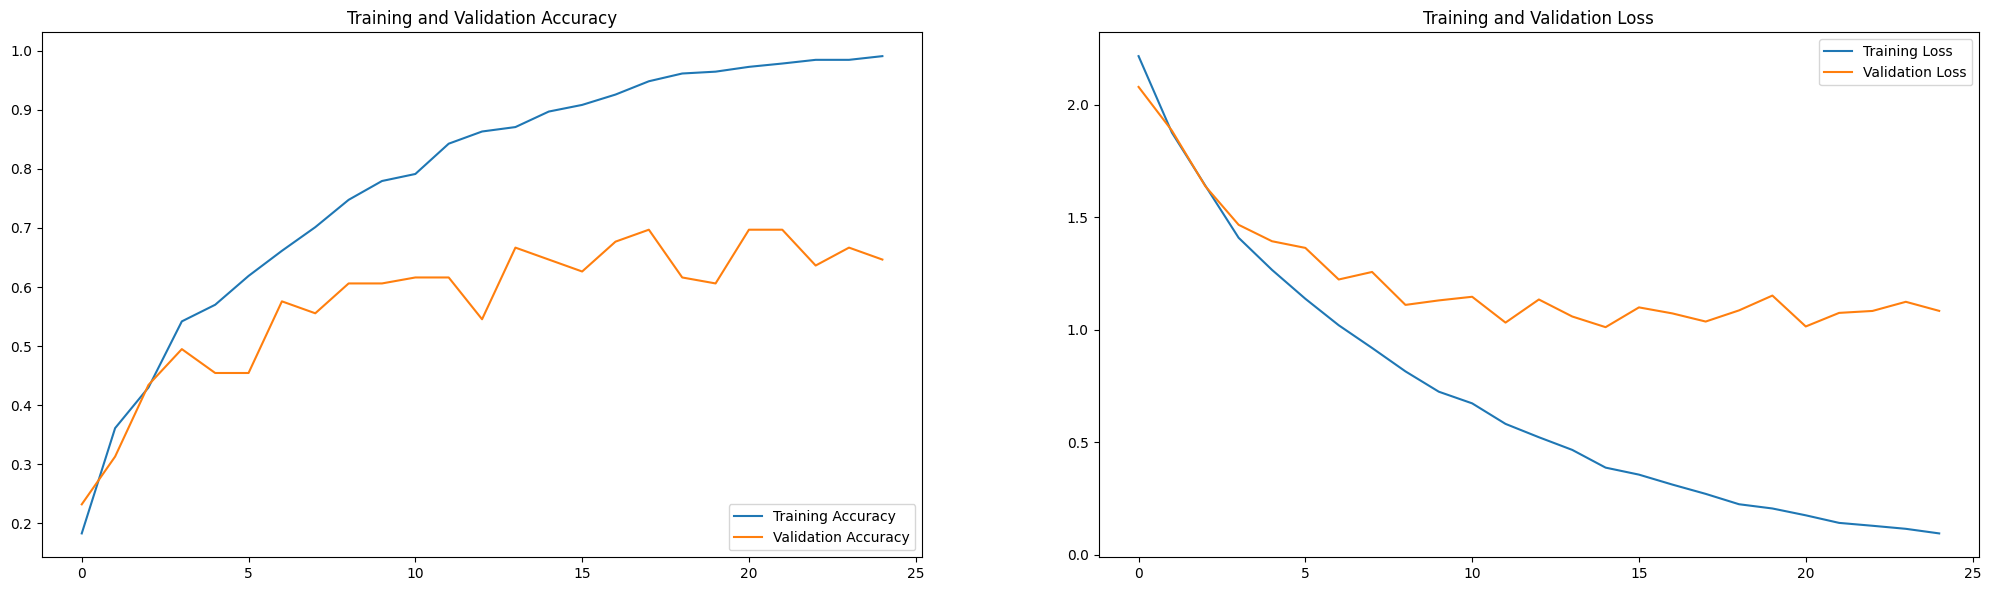

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
history = pickle.load(open('history_50_epoch_simple.pkl','rb'))
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs_range = range(25)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='Validation Accuracy', c='red', linewidth=4)
ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='Validation Loss', c='red', linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
#plt.show()
plt.savefig('sim_plot1.png',bbox_inches = 'tight')
plt.clf()

<Figure size 1500x600 with 0 Axes>

In [ ]:

predictions = model.predict(x_test)
print(y_test)
predicted_classes = np.argmax(predictions, axis=1)


print(classification_report(y_test, predicted_classes, target_names = labels))

4/4 [==============================] - 1s 116ms/step
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7
 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9]
              precision    recall  f1-score   support

         pop       0.60      0.60      0.60        10
      hiphop       0.60      0.30      0.40        10
       disco       0.56      0.50      0.53        10
       metal       1.00      0.80      0.89        10
        jazz       0.78      0.70      0.74        10
       blues       0.67      0.60      0.63        10
        rock       0.75      0.60      0.67        10
   classical       0.83      1.00      0.91        10
     country       0.55      0.60      0.57        10
      reggae       0.47      0.90      0.62        10

    accuracy                           0.66       100
   macro avg       0.68      0.66      0.66       100
weighted avg       0.68      0.66      

In [ ]:
#os.makedirs(path+"nouvelles")
import random
# file_name =
def gen_spectogram(file):

    x , sr = librosa.load(file)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb)
    plt.savefig(path +f'nouvelles/{random.randint(0,9999)}'+'.png')
    plt.close()



In [ ]:
gen_spectogram("/content/13 - J Cole - Dead Presidents.mp3")

<ipython-input-18-9964ed37a2e3>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  x , sr = librosa.load(file)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: '/content/13 - J Cole - Dead Presidents.mp3'

In [ ]:
def predict_spect(img):
  img_size = 256
  img_arr = cv2.imread(img)[...,::-1] #convert BGR to RGB format --- Array slicing to reverse order
  #print(img_arr)
  resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
  X =  np.array(resized_arr)
  model.predict()

In [ ]:
img_arr = cv2.imread("/content/Data/nouvelles/2416.png")[...,::-1] #convert BGR to RGB format --- Array slicing to reverse order
print(img_arr.shape)
resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
print(resized_arr.shape)
#print(resized_arr)
X = np.array(resized_arr) / 255
print(X.shape)

print(f"x_test: {x_test.shape}")
comp = model.predict(X)

#print(comp)
# X = X.reshape(-1, img_size, img_size, 1)
# print(X.shape)

# tr = model.predict([])
# print(tr)
# print(pred)
# X =  np.array(resized_arr)
# model.predict()